# Assignment 2 - B

In [27]:
%pip install numpy pandas matplotlib

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


## Import Dependencies

In [28]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Loading Dataset and Preprocessing

In [29]:
df = pd.read_csv('Hitters.csv')
print(df.shape)
df.head()

(322, 20)


,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague
0,293,66,1,30,29,14,1,293,66,1,30,29,14,A,E,446,33,20,NaN,A
1,315,81,7,24,38,39,14,3449,835,69,321,414,375,N,W,632,43,10,475.0,N
2,479,130,18,66,72,76,3,1624,457,63,224,266,263,A,W,880,82,14,480.0,A
3,496,141,20,65,78,37,11,5628,1575,225,828,838,354,N,E,200,11,3,500.0,N
4,321,87,10,39,42,30,2,396,101,12,48,46,33,N,E,805,40,4,91.5,N


### 59 samples don't have salary

In [30]:
print(df.isna().sum())
df = df.dropna()
df = df.reset_index(drop=True)

AtBat         0
Hits          0
HmRun         0
Runs          0
RBI           0
Walks         0
Years         0
CAtBat        0
CHits         0
CHmRun        0
CRuns         0
CRBI          0
CWalks        0
League        0
Division      0
PutOuts       0
Assists       0
Errors        0
Salary       59
NewLeague     0
dtype: int64


### Convert Strings to Categorical

In [31]:
df.head()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague
0,315,81,7,24,38,39,14,3449,835,69,321,414,375,N,W,632,43,10,475.0,N
1,479,130,18,66,72,76,3,1624,457,63,224,266,263,A,W,880,82,14,480.0,A
2,496,141,20,65,78,37,11,5628,1575,225,828,838,354,N,E,200,11,3,500.0,N
3,321,87,10,39,42,30,2,396,101,12,48,46,33,N,E,805,40,4,91.5,N
4,594,169,4,74,51,35,11,4408,1133,19,501,336,194,A,W,282,421,25,750.0,A


In [32]:
df['League'].unique()

array(['N', 'A'], dtype=object)

In [33]:
df['Division'].unique()

array(['W', 'E'], dtype=object)

In [34]:
df['NewLeague'].unique()

array(['N', 'A'], dtype=object)

In [35]:
def map_columns(column):
    unique_values = df[column].unique()
    mapping = {value: index + 1 for index, value in enumerate(unique_values)}
    df[column] = df[column].map(mapping)
    print(f"Mapping for {column}: {mapping}")

columns_to_map = ['League', 'Division', 'NewLeague']
for column in columns_to_map:
    map_columns(column)

Mapping for League: {'N': 1, 'A': 2}
Mapping for Division: {'W': 1, 'E': 2}
Mapping for NewLeague: {'N': 1, 'A': 2}


In [36]:
df.head()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague
0,315,81,7,24,38,39,14,3449,835,69,321,414,375,1,1,632,43,10,475.0,1
1,479,130,18,66,72,76,3,1624,457,63,224,266,263,2,1,880,82,14,480.0,2
2,496,141,20,65,78,37,11,5628,1575,225,828,838,354,1,2,200,11,3,500.0,1
3,321,87,10,39,42,30,2,396,101,12,48,46,33,1,2,805,40,4,91.5,1
4,594,169,4,74,51,35,11,4408,1133,19,501,336,194,2,1,282,421,25,750.0,2


### EDA

In [37]:
samples, features = np.shape(df)
df.shape

(263, 20)

In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 263 entries, 0 to 262
Data columns (total 20 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   AtBat      263 non-null    int64  
 1   Hits       263 non-null    int64  
 2   HmRun      263 non-null    int64  
 3   Runs       263 non-null    int64  
 4   RBI        263 non-null    int64  
 5   Walks      263 non-null    int64  
 6   Years      263 non-null    int64  
 7   CAtBat     263 non-null    int64  
 8   CHits      263 non-null    int64  
 9   CHmRun     263 non-null    int64  
 10  CRuns      263 non-null    int64  
 11  CRBI       263 non-null    int64  
 12  CWalks     263 non-null    int64  
 13  League     263 non-null    int64  
 14  Division   263 non-null    int64  
 15  PutOuts    263 non-null    int64  
 16  Assists    263 non-null    int64  
 17  Errors     263 non-null    int64  
 18  Salary     263 non-null    float64
 19  NewLeague  263 non-null    int64  
dtypes: float64

In [39]:
df.describe()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague
count,263.000000,263.000000,263.000000,263.000000,263.000000,263.000000,263.000000,263.000000,263.000000,263.000000,263.000000,263.000000,263.000000,263.000000,263.000000,263.000000,263.000000,263.000000,263.000000,263.000000
mean,403.642586,107.828897,11.619772,54.745247,51.486692,41.114068,7.311787,2657.543726,722.186312,69.239544,361.220532,330.418251,260.266160,1.528517,1.490494,290.711027,118.760456,8.593156,535.925882,1.536122
std,147.307209,45.125326,8.757108,25.539816,25.882714,21.718056,4.793616,2286.582929,648.199644,82.197581,331.198571,323.367668,264.055868,0.500138,0.500863,279.934575,145.080577,6.606574,451.118681,0.499644
min,19.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,19.000000,4.000000,0.000000,2.000000,3.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,67.500000,1.000000
25%,282.500000,71.500000,5.000000,33.500000,30.000000,23.000000,4.000000,842.500000,212.000000,15.000000,105.500000,95.000000,71.000000,1.000000,1.000000,113.500000,8.000000,3.000000,190.000000,1.000000
50%,413.000000,103.000000,9.000000,52.000000,47.000000,37.000000,6.000000,1931.000000,516.000000,40.000000,250.000000,230.000000,174.000000,2.000000,1.000000,224.000000,45.000000,7.000000,425.000000,2.000000
75%,526.000000,141.500000,18.000000,73.000000,71.000000,57.000000,10.000000,3890.500000,1054.000000,92.500000,497.500000,424.500000,328.500000,2.000000,2.000000,322.500000,192.000000,13.000000,750.000000,2.000000
max,687.000000,238.000000,40.000000,130.000000,121.000000,105.000000,24.000000,14053.000000,4256.000000,548.000000,2165.000000,1659.000000,1566.000000,2.000000,2.000000,1377.000000,492.000000,32.000000,2460.000000,2.000000


In [40]:
df.corr()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague
AtBat,1.000000,0.963969,0.555102,0.899829,0.796015,0.624448,0.012725,0.207166,0.225341,0.212422,0.237278,0.221393,0.132926,0.153176,0.056341,0.309607,0.342117,0.325577,0.394771,0.089838
Hits,0.963969,1.000000,0.530627,0.910630,0.788478,0.587311,0.018598,0.206678,0.235606,0.189364,0.238896,0.219384,0.122971,0.153522,0.083266,0.299688,0.303975,0.279876,0.438675,0.094990
HmRun,0.555102,0.530627,1.000000,0.631076,0.849107,0.440454,0.113488,0.217464,0.217496,0.492526,0.258347,0.349858,0.227183,0.222965,0.034851,0.250931,-0.161602,-0.009743,0.343028,0.199424
Runs,0.899829,0.910630,0.631076,1.000000,0.778692,0.697015,-0.011975,0.171811,0.191327,0.229701,0.237831,0.202335,0.163700,0.206001,0.107672,0.271160,0.179258,0.192609,0.419859,0.154911
RBI,0.796015,0.788478,0.849107,0.778692,1.000000,0.569505,0.129668,0.278126,0.292137,0.442190,0.307226,0.387777,0.233619,0.185858,0.090157,0.312065,0.062902,0.150155,0.449457,0.143549
Walks,0.624448,0.587311,0.440454,0.697015,0.569505,1.000000,0.134793,0.269450,0.270795,0.349582,0.332977,0.312697,0.429140,0.065760,0.072732,0.280855,0.102523,0.081937,0.443867,0.028461
Years,0.012725,0.018598,0.113488,-0.011975,0.129668,0.134793,1.000000,0.915681,0.897844,0.722371,0.876649,0.863809,0.837524,0.032893,0.020316,-0.020019,-0.085118,-0.156512,0.400657,0.023964
CAtBat,0.207166,0.206678,0.217464,0.171811,0.278126,0.269450,0.915681,1.000000,0.995057,0.801676,0.982747,0.950730,0.906712,0.023704,0.018623,0.053393,-0.007897,-0.070478,0.526135,0.004294
CHits,0.225341,0.235606,0.217496,0.191327,0.292137,0.270795,0.897844,0.995057,1.000000,0.786652,0.984542,0.946797,0.890718,0.022853,0.023642,0.067348,-0.013144,-0.068036,0.548910,-0.000887
CHmRun,0.212422,0.189364,0.492526,0.229701,0.442190,0.349582,0.722371,0.801676,0.786652,1.000000,0.825625,0.927903,0.810878,0.107299,0.026987,0.093822,-0.188886,-0.165369,0.524931,0.100298


### PCA

In [41]:
X = df.drop(columns=['Salary'])
y = df['Salary']

In [42]:
# Standardize the features
X_standardized = (X - X.mean()) / X.std()

In [43]:
# Calculate the covariance matrix
covariance_matrix = np.cov(X_standardized, rowvar=False)

# Calculate eigenvalues and eigenvectors
eigenvalues, eigenvectors = np.linalg.eig(covariance_matrix)

# Sort eigenvalues and corresponding eigenvectors in descending order
eig_pairs = [(eigenvalues[i], eigenvectors[:, i]) for i in range(len(eigenvalues))]
eig_pairs.sort(key=lambda x: x[0], reverse=True)

In [44]:
# Determine the number of components for efficient prediction
total_variance = sum(eigenvalues)
explained_variance = [eigenvalue / total_variance for eigenvalue in eigenvalues]
cumulative_explained_variance = np.cumsum(explained_variance)

# Find the number of components that explain at least 95% of the variance
desired_explained_variance = 0.95
num_components = np.argmax(cumulative_explained_variance >= desired_explained_variance) + 1
num_components

9

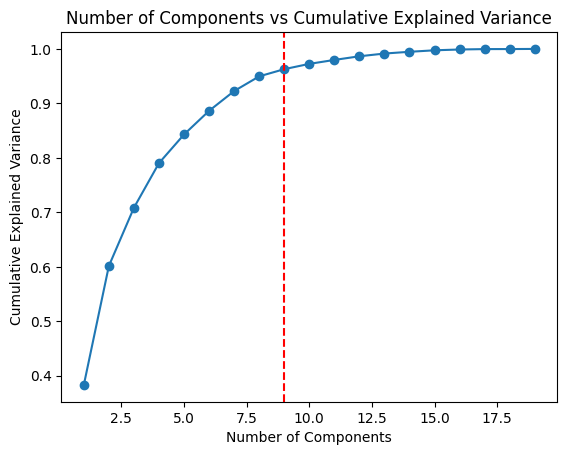

In [45]:
# Plot the explained variance to visualize the relationship
plt.plot(range(1, len(eigenvalues) + 1), cumulative_explained_variance, marker='o')
plt.axvline(x=num_components, color='r', linestyle='--', label=f'{desired_explained_variance * 100}% Variance')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Number of Components vs Cumulative Explained Variance')
plt.show()

In [47]:
# Project the original data onto the selected number of components
selected_eigenvectors = eigenvectors[:, :num_components]
pca_result = np.dot(X_standardized, selected_eigenvectors)

# Create a DataFrame with the principal components and the target variable
df_pca = pd.DataFrame(pca_result, columns=[f'PC{i + 1}' for i in range(num_components)])
df_pca['Salary'] = y
df_pca.to_csv('hitters_pca.csv', index=False)
df_pca.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,Salary
0,0.009630,-1.866962,1.262738,0.933701,1.107524,1.209666,-0.065022,0.098062,-0.251943,475.0
1,-0.410651,2.424799,-0.907463,0.263710,1.229687,1.823141,0.359208,1.197100,-0.371112,480.0
2,-3.460225,-0.824375,0.554412,1.613650,-0.855856,-1.026755,-0.997484,-0.842640,0.197004,500.0
3,2.553449,0.230544,0.518654,2.172110,-0.818740,1.488857,-0.275615,-0.206699,0.414166,91.5
4,-1.025747,1.570543,1.328848,-3.487355,0.981556,0.512698,0.140189,-0.987824,-0.660674,750.0


### Model Training and MSE